## Libraries

In [279]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import the dataset

In [280]:
df = pd.DataFrame(pd.read_csv('merged_df2.csv'))

C:\Users\SaraM\AppData\Local\Temp\ipykernel_15560\4150167128.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.DataFrame(pd.read_csv('merged_df2.csv'))


In [281]:
df.head(5)

,Unnamed: 0,method,data number,model number,unit number,id,propertyName,model name,unit name,availability,...,dist_to_School_of_Visual_Arts,dist_to_The_New_School,dist_to_Hunter_College_CUNY,dist_to_John_Jay_College_of_Criminal_Justice,dist_to_Rutgers_Newark,student_check,url,ifPrivate,price_imputation,price
0,0,Non_models,0,NaN,NaN,wwc0jkj,916 Bergen St Unit 6A,NaN,NaN,NaN,...,4.514859,4.543498,6.310506,6.734207,12.267343,1,https://www.apartments.com/916-bergen-st-brook...,0,0,3800.0
1,1,Non_models,1,NaN,NaN,m5myznk,Queen bedroom in 4 bed/1.5 bath Home,NaN,NaN,NaN,...,5.632617,6.073677,3.425003,3.890864,13.053021,1,https://www.apartments.com/queen-bedroom-in-4-...,1,0,1150.0
2,2,Non_models,2,NaN,NaN,600p48v,1087 Flushing Ave,NaN,NaN,NaN,...,3.738767,4.108006,4.771875,5.602237,13.153967,1,https://www.apartments.com/1087-flushing-ave-b...,0,0,5300.0
3,3,Non_models,3,NaN,NaN,hr20m63,696 Hancock St Unit 3L,NaN,NaN,NaN,...,4.760808,5.001806,6.079018,6.800813,13.540258,0,https://www.apartments.com/696-hancock-st-broo...,0,0,3300.0
4,4,models,4,0.0,0.0,r774f30,Common Cypress,Coliving Suite 4,Unit 4-2,Not Available,...,4.796542,5.199030,5.582969,6.531989,14.262687,0,https://www.apartments.com/common-cypress-flus...,0,0,1982.0


## Data Preparation

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Columns: 204 entries, Unnamed: 0 to price
dtypes: bool(1), float64(26), int64(165), object(12)
memory usage: 10.6+ MB


In [284]:
amenities= ['24 Hour Availability', 'Air Conditioning', 'Attic', 'Balcony', 'Basement', 'Basketball Court', 'Bay Window', 'Bike Storage',
'Breakfast Nook', 'Breakfast/Coffee Concierge', 'Built-In Bookshelves', 'Business Center', 'Cabana', 'Cable Ready', 'Car Charging Station', 'Carpet',
'Ceiling Fans', 'Clubhouse', 'Coffee System', 'Community-Wide WiFi', 'Concierge', 'Conference Room', 'Controlled Access', 'Corporate Suites',
'Courtyard', 'Crown Molding', 'Day Care', 'Deck', 'Den', 'Dining Room', 'Dishwasher', 'Disposal',
'Disposal Chutes', 'Dock', 'Doorman', 'Double Pane Windows', 'Double Vanities', 'Dry Cleaning Service', 'Eat-in Kitchen', 'Elevator',
'Family Room', 'Fenced Lot', 'Fireplace', 'Fitness Center', 'Framed Mirrors', 'Freezer', 'Furnished', 'Furnished Units Available',
'Gameroom', 'Garden', 'Gated', 'Granite Countertops', 'Greenhouse', 'Grill', 'Grocery Service', 'Guest Apartment',
'Handrails', 'Hardwood Floors', 'Health Club Discount', 'Hearing Impaired Accessible', 'Heating', 'High Speed Internet Access', 'House Sitter Services', 'Ice Maker',
'In Unit Washer & Dryer', 'Individual Leases Available', 'Individual Locking Bedrooms', 'Instant Hot Water', 'Intercom', 'Island Kitchen', 'Key Fob Entry', 'Kitchen',
'Lake Access', 'Large Bedrooms', 'Laundry Facilities', 'Laundry Service', 'Lawn', 'Linen Closet', 'Loft Layout', 'Lounge',
'Maid Service', 'Maintenance on site', 'Meal Service', 'Media Center/Movie Theatre', 'Microwave', 'Mother-in-law Unit', 'Mud Room', 'Multi Use Room',
'Office', 'On-Site ATM', 'On-Site Retail', 'Online Services', 'Oven', 'Package Service', 'Pantry', 'Patio',
'Pet Care', 'Pet Play Area', 'Pet Washing Station', 'Picnic Area', 'Planned Social Activities', 'Playground', 'Pond', 'Pool',
'Porch', 'Private Bathroom', 'Property Manager on Site', 'Public Transportation', 'Putting Greens', 'Racquetball Court', 'Range', 'Recreation Room',
'Recycling', 'Refrigerator', 'Renters Insurance Program', 'Roof Terrace', 'Roommate Matching', 'Satellite TV', 'Sauna', 'Security System',
'Shuttle to Train', 'Skylight', 'Smoke Free', 'Spa', 'Sprinkler System', 'Stainless Steel Appliances', 'Storage Space', 'Storage Units',
'Study Lounge', 'Sundeck', 'Sunroom', 'Surround Sound', 'Tennis Court', 'Tile Floors', 'Trash Compactor', 'Trash Pickup - Curbside',
'Trash Pickup - Door to Door', 'Tub/Shower', 'Vacuum System', 'Vaulted Ceiling', 'Video Patrol', 'Views', 'Vintage Building', 'Vinyl Flooring',
'Vision Impaired Accessible', 'Volleyball Court', 'Walk To Campus', 'Walk-In Closets', 'Walking/Biking Trails', 'Warming Drawer', 'Washer/Dryer Hookup',
'Waterfront','Wet Bar','Wheelchair Accessible (Rooms)','Wi-Fi','Wi-Fi at Pool and Clubhouse','Window Coverings','Workshop','Yard','Zen Garden']

In [285]:
amenities_to_drop = []
for i in amenities:
    if df[i].sum() <= 100:
        amenities_to_drop.append(i)
    #print('sum of ' + i + ' is ' + str(df[i].sum()))

In [286]:
cols_to_drop = ['Unnamed: 0','method','data number','model number','unit number','id','propertyName', \
                'model name','unit name','availability','address','zip','street','url','price_imputation','city', \
                'dist_to_College_of_Staten_Island',
                'dist_to_Stevens_Institute_of_Technology',
                'dist_to_Fordham_University',
                'dist_to_Berkeley_College',
                'dist_to_Pratt_Institute',
                'dist_to_New_York_University',
                'dist_to_Fashion_Institute_of_Technology',
                'dist_to_Hofstra_University',
                'dist_to_Teachers_College_Columbia_University',
                 'dist_to_Columbia_University',
                'dist_to_School_of_Visual_Arts',
                'dist_to_The_New_School',
                'dist_to_Hunter_College_CUNY',
                'dist_to_John_Jay_College_of_Criminal_Justice',
                'dist_to_Rutgers_Newark','longitude','latitude','state']
df_original=df.copy()
df = df.drop(columns=cols_to_drop)
df = df.drop(columns=amenities_to_drop)

In [287]:
df['neighborhood_code'] = pd.factorize(df['neighborhood'])[0]
#df['state_code'] = pd.factorize(df['state'])[0]
df = df.drop(columns=['neighborhood'])
df=df[['transitScore',
 'neighborhood_code',
 'walkScore',
 'price',
 'area',
 'isVerified',
 'roomtype',
 'Laundry Facilities',
 'High Speed Internet Access',
 'Oven',
 'Hardwood Floors',
 'Cable Ready',
 'In Unit Washer & Dryer',
 'bathtype',
 'Balcony',
 'Kitchen',
 'Dishwasher',
 'Air Conditioning',
 'Gameroom',
 'Pet Care',
 'Dining Room',
 '24 Hour Availability',
 'Freezer',
 'Heating',
 'Playground',
 'student_check']]

## Addressing the classes imbalance

In [288]:
from imblearn.over_sampling import ADASYN
X = df.loc[:, df.columns != 'student_check']
y = df.loc[:, df.columns == 'student_check']

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

columns = X.columns
X_resampled = pd.DataFrame(data=X_resampled,columns=columns )
y_resampled= pd.DataFrame(data=y_resampled)
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
resampled_df


,transitScore,neighborhood_code,walkScore,price,area,isVerified,roomtype,Laundry Facilities,High Speed Internet Access,Oven,...,Dishwasher,Air Conditioning,Gameroom,Pet Care,Dining Room,24 Hour Availability,Freezer,Heating,Playground,student_check
0,100.000000,0,88.000000,3800.000000,1000.000000,False,3.0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,100.000000,1,98.000000,1150.000000,1200.000000,False,4.0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,96.000000,2,97.000000,5300.000000,710.000000,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,98.000000,3,94.000000,3300.000000,1107.000000,False,2.0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,100.000000,4,96.000000,1982.000000,140.000000,True,0.0,1,1,0,...,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,66.419319,6,87.951702,1789.517018,710.000000,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8435,97.406127,2,92.812253,2317.576582,710.000000,True,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8436,84.605268,20,90.378292,10526.130893,1087.557541,True,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8437,97.875963,35,97.362789,7843.256181,985.903932,True,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [289]:
len(resampled_df[resampled_df['student_check']==0])/len(resampled_df)
len(resampled_df[resampled_df['student_check']==1])/len(resampled_df)

0.5126199786704586

## Split Data Into Train Test

In [290]:
X = resampled_df.loc[:, resampled_df.columns != 'student_check']
y = resampled_df['student_check']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

## Random Forest

In [292]:
rf = RandomForestClassifier(n_estimators=100, random_state=12)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Classifier on training set: {:.3f}'.format(r1))
print('R² of Random Forest ClassifierRegressor on test set: {:.3f}'.format(r2))

R² of Random Forest Classifier on training set: 1.000
R² of Random Forest ClassifierRegressor on test set: 0.932


### Model Tuning 

Number of trees  1
R² of Random Forest Classifier on training set: 0.949
R² of Random Forest Classifier on test set: 0.873
 
Number of trees  2
R² of Random Forest Classifier on training set: 0.950
R² of Random Forest Classifier on test set: 0.866
 
Number of trees  3
R² of Random Forest Classifier on training set: 0.982
R² of Random Forest Classifier on test set: 0.897
 
Number of trees  4
R² of Random Forest Classifier on training set: 0.982
R² of Random Forest Classifier on test set: 0.901
 
Number of trees  5
R² of Random Forest Classifier on training set: 0.992
R² of Random Forest Classifier on test set: 0.918
 
Number of trees  6
R² of Random Forest Classifier on training set: 0.990
R² of Random Forest Classifier on test set: 0.915
 
Number of trees  7
R² of Random Forest Classifier on training set: 0.995
R² of Random Forest Classifier on test set: 0.914
 
Number of trees  8
R² of Random Forest Classifier on training set: 0.994
R² of Random Forest Classifier on test set: 0.916
 


Number of trees  67
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.929
 
Number of trees  68
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.927
 
Number of trees  69
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.931
 
Number of trees  70
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.927
 
Number of trees  71
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.932
 
Number of trees  72
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.934
 
Number of trees  73
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 0.929
 
Number of trees  74
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest Classifier on test set: 

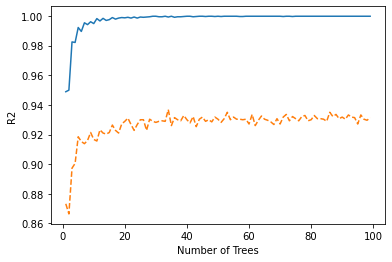

In [308]:
forest_sizes = range(1,100)
train_R2 = np.zeros(len(forest_sizes))
test_R2 = np.zeros(len(forest_sizes))
                    
for i in range(len(forest_sizes)):
    size = forest_sizes[i]
    rf = RandomForestClassifier(n_estimators=size)
    rf.fit(X_train, np.ravel(y_train))
    r1 = rf.score(X_train, y_train)
    r2 = rf.score(X_test, y_test)
    train_R2[i] = r1
    test_R2[i] = r2
    print('Number of trees ', size)
    print('R² of Random Forest Classifier on training set: {:.3f}'.format(r1))
    print('R² of Random Forest Classifier on test set: {:.3f}'.format(r2))
    print(' ')

fig, ax = plt.subplots()
ax.plot(forest_sizes, train_R2,'-')
ax.plot(forest_sizes, test_R2,'--')
plt.xlabel('Number of Trees')
plt.ylabel('R2')
plt.show()

In [309]:
# # Find the number of trees associated with the lowest test_R2
# best_size_idx = np.argmax(test_R2)
# best_size = forest_sizes[best_size_idx]
# print('Best number of trees: ', best_size)


# Find index of highest value in test_R2
max_index = list(test_R2).index(max(list(test_R2)))

# Find minimum value in forest size that occurs at or after max_index
min_value = min((list(forest_sizes)[max_index:]))

# Refit the model with the best number of trees on the entire training set
best_rf = RandomForestClassifier(n_estimators=min_value)
best_rf.fit(X_train, np.ravel(y_train))
r1 = best_rf.score(X_train, y_train)
r2 = best_rf.score(X_test, y_test)


print('Best number of trees: ', min_value)
print('R² of Random Forest Classifier on training set: {:.3f}'.format(r1))
print('R² of Random Forest Classifier on test set: {:.3f}'.format(r2))
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_train.columns
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

Best number of trees:  34
R² of Random Forest Classifier on training set: 1.000
R² of Random Forest ClassifierRegressor on test set: 0.929
 1) transitScore                   0.261781
 2) neighborhood_code              0.133409
 3) walkScore                      0.125032
 4) price                          0.089212
 5) area                           0.042155
 6) isVerified                     0.041643
 7) Laundry Facilities             0.028835
 8) roomtype                       0.026920
 9) Oven                           0.024598
10) In Unit Washer & Dryer         0.023274
11) High Speed Internet Access     0.021399
12) Hardwood Floors                0.018535
13) Kitchen                        0.018390
14) Freezer                        0.016873
15) Cable Ready                    0.015683
16) Dishwasher                     0.014531
17) Air Conditioning               0.014083
18) Gameroom                       0.014016
19) bathtype                       0.013744
20) Playground           

In [310]:
forest_sizes

range(1, 100)

## Feature Importances

In [311]:
importances = rf.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) transitScore                   0.261781
 2) neighborhood_code              0.133409
 3) walkScore                      0.125032
 4) price                          0.089212
 5) area                           0.042155
 6) isVerified                     0.041643
 7) Laundry Facilities             0.028835
 8) roomtype                       0.026920
 9) Oven                           0.024598
10) In Unit Washer & Dryer         0.023274
11) High Speed Internet Access     0.021399
12) Hardwood Floors                0.018535
13) Kitchen                        0.018390
14) Freezer                        0.016873
15) Cable Ready                    0.015683
16) Dishwasher                     0.014531
17) Air Conditioning               0.014083
18) Gameroom                       0.014016
19) bathtype                       0.013744
20) Playground                     0.013153
21) Heating                        0.010774
22) Dining Room                    0.009266
23) Balcony                     

In [312]:
final_features=[]
for f in range(X_train.shape[1]):
    final_features.append(feat_labels[sorted_indices[f]])
final_features

['transitScore',
 'neighborhood_code',
 'walkScore',
 'price',
 'area',
 'isVerified',
 'Laundry Facilities',
 'roomtype',
 'Oven',
 'In Unit Washer & Dryer',
 'High Speed Internet Access',
 'Hardwood Floors',
 'Kitchen',
 'Freezer',
 'Cable Ready',
 'Dishwasher',
 'Air Conditioning',
 'Gameroom',
 'bathtype',
 'Playground',
 'Heating',
 'Dining Room',
 'Balcony',
 '24 Hour Availability',
 'Pet Care']

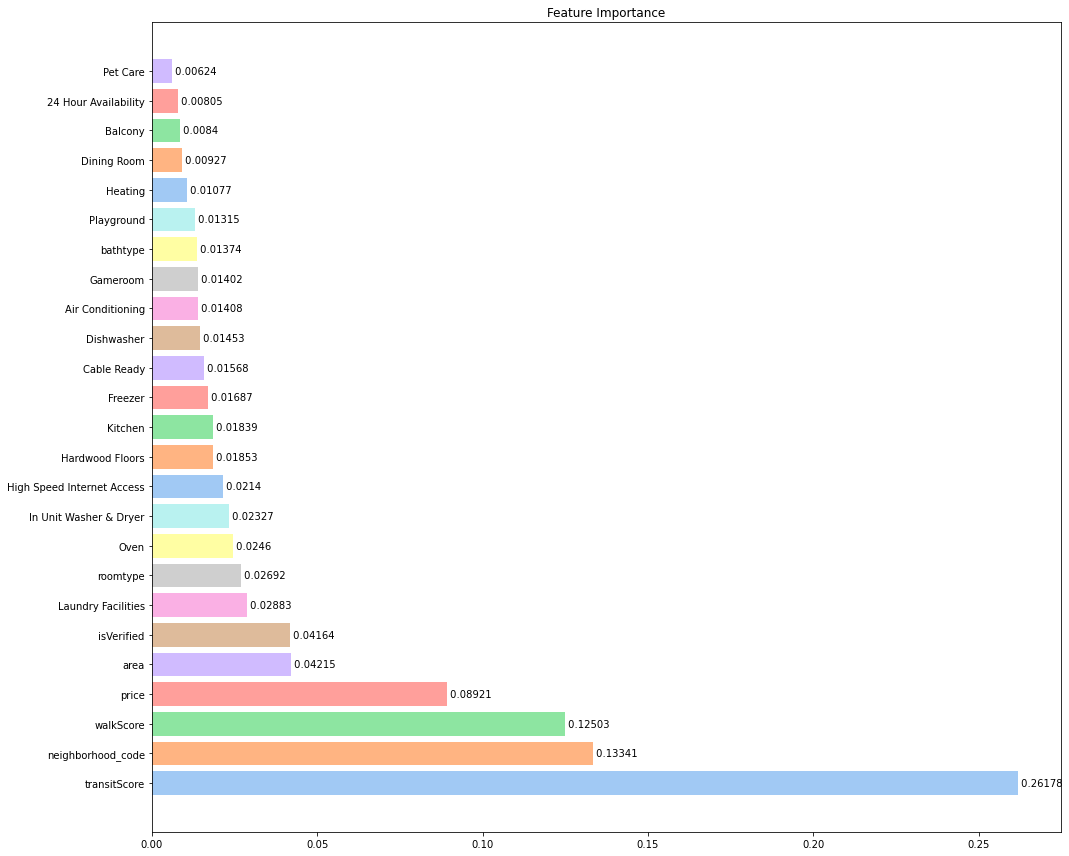

In [313]:
import seaborn as sns
palette = sns.color_palette("pastel", 30)
plt.figure(figsize=(15, 12))  # Set the figure size to be 12 inches wide and 6 inches tall
plt.title('Feature Importance')
plt.barh(range(25), importances[sorted_indices][0:25], align='center', color=palette)
plt.yticks(range(25), X_train.columns[sorted_indices][0:25])
for i, v in enumerate(importances[sorted_indices][0:25]):
    plt.text(v, i, " " +str(round(v,5)), color='black', va='center')
plt.tight_layout()
plt.show()

## Model Evaluation

In [314]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.930     0.929     0.930      1358
           1      0.933     0.933     0.933      1427

    accuracy                          0.931      2785
   macro avg      0.931     0.931     0.931      2785
weighted avg      0.931     0.931     0.931      2785



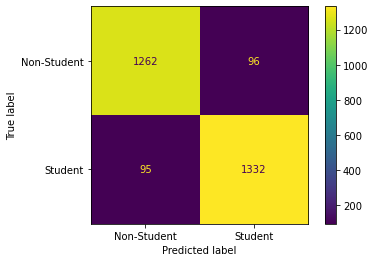

In [315]:
labels = ['Non-Student','Student']
cm = metrics.confusion_matrix(y_test, y_pred)
dissplay_cm= ConfusionMatrixDisplay(confusion_matrix=cm,
                                           display_labels=labels)
dissplay_cm.plot()